In [124]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree as treeClassifier

In [2]:
#Cargamos el csv con los datos de los asegurados
siniestros = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datos_siniestro.csv', sep='|', index_col=0)
#, names=['id', 'idsin', 'numsin', 'codsin', 'ocurrido', 'diagnostico', 'poliza', 'sexo', 'edad', 'fallecido', 'covid', 'sospecha_covid', 'tumor_maligno', 'diabetes', 'neumonia', 'paro_infarto', 'insuf_respiratoria', 'insuf_renal', 'cirrosis', 'choque medico', 'acidosis', 'asfixia', 'otras_causas'])
siniestros.head()

,IDSIN,NUMSIN,CODSIN,OCURRIDO,DIAGNOSTICO,POLIZA,SEXO,EDAD,FALLECIDO,COVID,...,DIABETES,NEUMONIA,PARO O INFARTO,INSUFICIENCIA RESPIRATORIA,INSUFICIENCIA RENAL,CIRROSIS,CHOQUE MEDICO,ACIDOSIS,ASFIXIA,OTRAS CAUSAS
ID,,,,,,,,,,,,,,,,,,,,,
5067980,846213,19100456,VI00,17/04/19,INFARTO AGUDO DEL MIOCARDIO,VI00-1503848-380,1,56,S,0,...,0,0,1,0,0,0,0,0,0,0
4758080,844600,19100445,VI00,23/04/19,OTRAS DIABETES MELLITUS ESPECIFICADAS,VI00-3531957-200,0,69,S,0,...,0,0,0,0,0,0,0,0,0,1
4202335,860740,19100522,VI00,27/04/19,ENFERMEDAD POR VIRUS DE LA INMUNODEFICIENCIA H...,VI00-3458173-200,1,32,S,0,...,0,0,0,0,0,0,0,0,0,1
4508048,868085,19100549,VI00,18/04/19,INSUFICIENCIA RENAL CRONICA,VI00-1550805-200,1,62,S,0,...,0,0,0,0,1,0,0,0,0,0
3782760,873200,19100573,VI00,03/05/19,CIRROSIS HEPATICA ALCOHOLICA,VI00-3399851-200,1,53,S,0,...,0,0,0,0,0,1,0,0,0,0


In [3]:
siniestros.shape

(10451, 22)

In [4]:
siniestros.dtypes

IDSIN                          int64
NUMSIN                         int64
CODSIN                        object
OCURRIDO                      object
DIAGNOSTICO                   object
POLIZA                        object
SEXO                           int64
EDAD                           int64
FALLECIDO                     object
COVID                          int64
SOSPECHA COVID                 int64
TUMOR MALIGNO                  int64
DIABETES                       int64
NEUMONIA                       int64
PARO O INFARTO                 int64
INSUFICIENCIA RESPIRATORIA     int64
INSUFICIENCIA RENAL            int64
CIRROSIS                       int64
CHOQUE MEDICO                  int64
ACIDOSIS                       int64
ASFIXIA                        int64
OTRAS CAUSAS                   int64
dtype: object

In [5]:
#necesitamos transformar las columnas fecha en dicho tipo de dato
diccionario_de_conversion = {
    'OCURRIDO': 'datetime64[ns]'
}

siniestros = siniestros.astype(diccionario_de_conversion)
siniestros.dtypes

IDSIN                                  int64
NUMSIN                                 int64
CODSIN                                object
OCURRIDO                      datetime64[ns]
DIAGNOSTICO                           object
POLIZA                                object
SEXO                                   int64
EDAD                                   int64
FALLECIDO                             object
COVID                                  int64
SOSPECHA COVID                         int64
TUMOR MALIGNO                          int64
DIABETES                               int64
NEUMONIA                               int64
PARO O INFARTO                         int64
INSUFICIENCIA RESPIRATORIA             int64
INSUFICIENCIA RENAL                    int64
CIRROSIS                               int64
CHOQUE MEDICO                          int64
ACIDOSIS                               int64
ASFIXIA                                int64
OTRAS CAUSAS                           int64
dtype: obj

In [6]:
#determinamos cuantos NaN tenemos por columna
siniestros.isna().sum(axis=0)

IDSIN                         0
NUMSIN                        0
CODSIN                        0
OCURRIDO                      0
DIAGNOSTICO                   0
POLIZA                        0
SEXO                          0
EDAD                          0
FALLECIDO                     0
COVID                         0
SOSPECHA COVID                0
TUMOR MALIGNO                 0
DIABETES                      0
NEUMONIA                      0
PARO O INFARTO                0
INSUFICIENCIA RESPIRATORIA    0
INSUFICIENCIA RENAL           0
CIRROSIS                      0
CHOQUE MEDICO                 0
ACIDOSIS                      0
ASFIXIA                       0
OTRAS CAUSAS                  0
dtype: int64

In [7]:
#ahora determinamos por fila
siniestros.isna().sum(axis=1)

ID
5067980     0
4758080     0
4202335     0
4508048     0
3782760     0
           ..
8753986     0
6909394     0
6919216     0
6919086     0
12767936    0
Length: 10451, dtype: int64

In [8]:
#ya tenemos los datos como queremos, resolvamos preguntas
#Cantidad de siniestros por sexo
siniestros.groupby('SEXO').size()

SEXO
0    2597
1    7854
dtype: int64

In [25]:
#Determinamos promedio, mediana, maxima y minima edad por producto y diagnostico
siniestros.groupby(['CODSIN','DIAGNOSTICO'])['EDAD'].agg(['mean', 'median','max', 'min'])

mean  median  max  \
CODSIN DIAGNOSTICO                                                             
VI00   ABDOMEN AGUDO                                       64.0    64.0   64   
       ABSCESO CEREBRAL FEOMICOTICO                        53.0    53.0   53   
       ACCIDENTE VASCULAR ENCEFALICO AGUDO NO ESPECIFI...  55.4    50.0   72   
       ACIDOSIS                                            47.1    48.0   66   
       ACIDOSIS METABOLICA TARDIA DEL RECIEN NACIDO        64.0    64.0   64   
...                                                         ...     ...  ...   
VI27   TUMOR MALIGNO DEL HIGADO, NO ESPECIFICADO           59.0    59.0   59   
       TUMOR MALIGNO DEL OVARIO                            72.0    72.0   72   
VI33   DIABETES MELLITUS NO INSULINODEPENDIENTE SIN ME...  72.5    72.5   73   
       ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EXA...  89.0    89.0   89   
VI37   TUMOR MALIGNO DEL ENDOMETRIO                        71.0    71.0   71   

                                                           min  
CODSIN DIAGNOSTICO                                              
VI00   ABDOMEN AGUDO                                        64  
       ABSCESO CEREBRAL FEOMICOTICO                         53  
       ACCIDENTE VASCULAR ENCEFALICO AGUDO NO ESPECIFI...   40  
       ACIDOSIS                                             31  
       ACIDOSIS METABOLICA TARDIA DEL RECIEN NACIDO         64  
...                                                        ...  
VI27   TUMOR MALIGNO DEL HIGADO, NO ESPECIFICADO            59  
       TUMOR MALIGNO DEL OVARIO                             72  
VI33   DIABETES MELLITUS NO INSULINODEPENDIENTE SIN ME...   72  
       ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA CON EXA...   89  
VI37   TUMOR MALIGNO DEL ENDOMETRIO                         71  

[1605 rows x 4 columns]

In [26]:
#Por sexo y edad, cantidad de siniestros por producto y diagnostico
#Sexo 0 = FEMENINO, 1 = MASCULINO
siniestros.groupby(['SEXO','EDAD'])['CODSIN', 'DIAGNOSTICO'].value_counts()

SEXO  EDAD  CODSIN  DIAGNOSTICO                                                                    
0     19    VI17    PROBLEMAS RELACIONADOS CON EL DESEMPLEO, NO ESPECIFICADOS                          1
      21    VI17    PROBLEMAS RELACIONADOS CON EL EMPLEO Y EL DESEMPLEO                                1
      22    VI17    PROBLEMAS RELACIONADOS CON EL DESEMPLEO, NO ESPECIFICADOS                          3
      23    VI08    TUMOR BENIGNO DE LOS HUESOS PELVICOS, SACRO Y COCCIX                               2
            VI17    PROBLEMAS RELACIONADOS CON EL EMPLEO Y EL DESEMPLEO                                1
                                                                                                      ..
1     87    VI27    CHOQUE HIPOVOLEMICO                                                                1
      88    VI26    ASFIXIA                                                                            1
      89    VI33    ENFERMEDAD PULMONAR OBSTRUCTIVA CRONICA 

In [29]:
#Determinamos la mayor causa de fallecimiento según sexo y edad
#Sexo 0 = FEMENINO, 1 = MASCULINO
siniestros.groupby(['DIAGNOSTICO'])['SEXO'].value_counts()

DIAGNOSTICO                                                    SEXO
ABDOMEN AGUDO                                                  1       4
                                                               0       1
ABSCESO AMEBIANO DEL HIGADO                                    1       1
ABSCESO ANAL                                                   1       1
ABSCESO CEREBRAL FEOMICOTICO                                   1       2
                                                                      ..
URETRITIS Y SINDROME URETRAL                                   0       1
VARICES ESOFAGICAS EN ENFERMEDADES CLASIFICADAS EN OTRA PARTE  1       1
VENAS VARICOSAS DE LOS MIEMBROS INFERIORES CON INFLAMACION     0       1
VERRUGAS (VENEREAS) ANOGENITALES                               1       1
VOLVULO                                                        0       1
Name: SEXO, Length: 1044, dtype: int64

In [31]:
#Fallecimientos por sexo y en rango de edades (mayores de 30 año y menores o igual a 65 años)
aseg_mayor_30 = siniestros['EDAD'] > 30
aseg_menor_65 = siniestros['EDAD'] <= 65
siniestros[aseg_mayor_30 & aseg_menor_65].groupby(['SEXO'])['EDAD', 'DIAGNOSTICO'].value_counts()

SEXO  EDAD  DIAGNOSTICO                                                                        
0     49    PROBLEMAS RELACIONADOS CON EL DESEMPLEO, NO ESPECIFICADOS                              20
      32    PROBLEMAS RELACIONADOS CON EL DESEMPLEO, NO ESPECIFICADOS                              20
      60    CASOS CONFIRMADOS PARA LA ENFERMEDAD RESPIRATORIA AGUDA DEBIDO AL NUEVO CORONAVIRUS    17
      39    PROBLEMAS RELACIONADOS CON EL DESEMPLEO, NO ESPECIFICADOS                              16
      59    CASOS CONFIRMADOS PARA LA ENFERMEDAD RESPIRATORIA AGUDA DEBIDO AL NUEVO CORONAVIRUS    15
                                                                                                   ..
1     37    CONVULSIONES NO CLASIFICADAS EN OTRA PARTE                                              1
            CONTUSION DEL TORAX                                                                     1
            CHOQUE NO CLASIFICADO EN OTRA PARTE                                         

In [32]:
siniestros.columns

Index(['IDSIN', 'NUMSIN', 'CODSIN', 'OCURRIDO', 'DIAGNOSTICO', 'POLIZA',
       'SEXO', 'EDAD', 'FALLECIDO', 'COVID', 'SOSPECHA COVID', 'TUMOR MALIGNO',
       'DIABETES', 'NEUMONIA', 'PARO O INFARTO', 'INSUFICIENCIA RESPIRATORIA',
       'INSUFICIENCIA RENAL', 'CIRROSIS', 'CHOQUE MEDICO', 'ACIDOSIS',
       'ASFIXIA', 'OTRAS CAUSAS'],
      dtype='object')

In [33]:
# Datos estadísticos de interés.
siniestros.EDAD.describe()

count    10451.000000
mean        53.721749
std         13.321296
min         19.000000
25%         44.000000
50%         56.000000
75%         64.000000
max         98.000000
Name: EDAD, dtype: float64

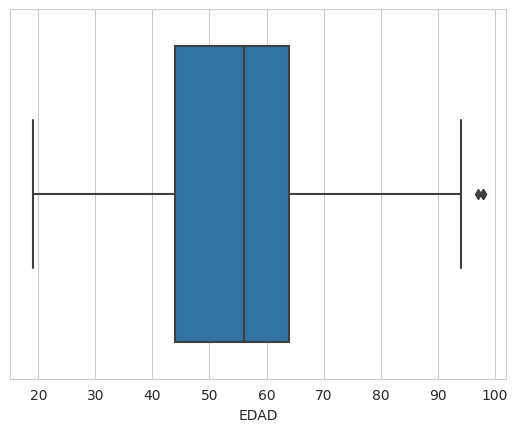

In [34]:
# Diagrama de caja.
sns.set_style("whitegrid")
sns.boxplot(x=siniestros['EDAD']);

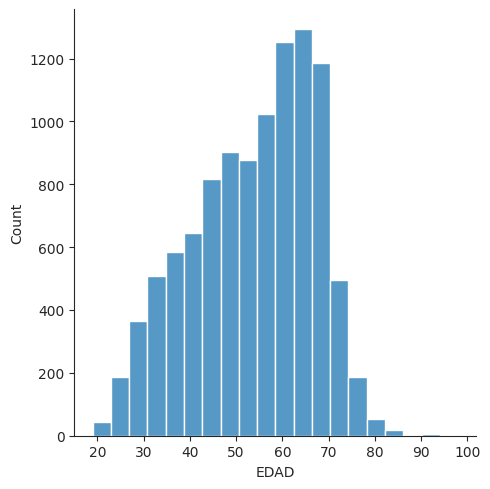

In [35]:
# Histograma
sns.set_style('ticks')
sns.displot(siniestros['EDAD'], kde=False, bins=20);

In [36]:
siniestros.mode().head(1)[['DIAGNOSTICO', 'COVID', 'SOSPECHA COVID', 'TUMOR MALIGNO', 'DIABETES', 'NEUMONIA', 'PARO O INFARTO', 'INSUFICIENCIA RESPIRATORIA', 'INSUFICIENCIA RENAL', 'CIRROSIS', 'CHOQUE MEDICO', 'ACIDOSIS', 'ASFIXIA', 'OTRAS CAUSAS']]


,DIAGNOSTICO,COVID,SOSPECHA COVID,TUMOR MALIGNO,DIABETES,NEUMONIA,PARO O INFARTO,INSUFICIENCIA RESPIRATORIA,INSUFICIENCIA RENAL,CIRROSIS,CHOQUE MEDICO,ACIDOSIS,ASFIXIA,OTRAS CAUSAS
0,CASOS CONFIRMADOS PARA LA ENFERMEDAD RESPIRATO...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
#Revisamos tabla cruzada
crosstab = pd.crosstab(siniestros['EDAD'], [siniestros['SEXO'], siniestros['COVID']], margins=True, margins_name='total')
crosstab

SEXO      0          1        total
COVID     0    1     0     1       
EDAD                               
19        1    0     3     0      4
20        0    0     3     0      3
21        1    0     8     0      9
22        3    0    24     0     27
23        5    0    21     0     26
...     ...  ...   ...   ...    ...
93        1    0     1     0      2
94        0    0     1     0      1
97        1    0     0     0      1
98        2    0     0     0      2
total  2180  417  6318  1536  10451

[76 rows x 5 columns]

In [131]:
#Revisamos tabla cruzada
crosstab = pd.crosstab(siniestros['SEXO'], [siniestros['COVID'], siniestros['SOSPECHA COVID']], margins=True, margins_name='total')
crosstab

COVID              0          1  total
SOSPECHA COVID     0    1     0       
SEXO                                  
0               2060  120   417   2597
1               5863  455  1536   7854
total           7923  575  1953  10451

In [133]:
#Revisamos tabla cruzada
crosstab = pd.crosstab(siniestros['SEXO'], [siniestros['FALLECIDO']], margins=True, margins_name='total')
crosstab

FALLECIDO,N,S,total
SEXO,,,
0,808,1789,2597
1,1990,5864,7854
total,2798,7653,10451
